<a href="https://colab.research.google.com/github/trashpanda900/Data-Science/blob/main/TeddMcBrU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Idea: What will be Carlos Alcaraz's first serve percentage this season?

Carlos Alcaraz, the current #1 ranked player in the world, has a strong first serve that makes it almost impossible to lose his service games. During the most recent tournament, the US open, Alcaraz lost only 3 service games, and would go on to win the tournament. That being said, if Alcaraz were to miss his strong first serve, he would be forced to do a less strong second serve, likely lowering his odds of winning his service games, so how often does his first serve actually go in?

In order to find how often Alcaraz will hit his first serve in for a given season, we first need to find Alcaraz's first serve % for the season prior. This means to find the 2025 season percentage, we need to know the 2024 %, which was 65%.

Alcaraz's 2024 season percentage: 65%
Observed Match - Nuno Borges vs Carlos Alcaraz, Australian Open, round of 32: 68/109, 62%

In [ ]:
!pip install preliz

In [13]:
import preliz as pz

In [14]:
import numpy as np
import arviz as az
import pymc as pm

<Axes: >

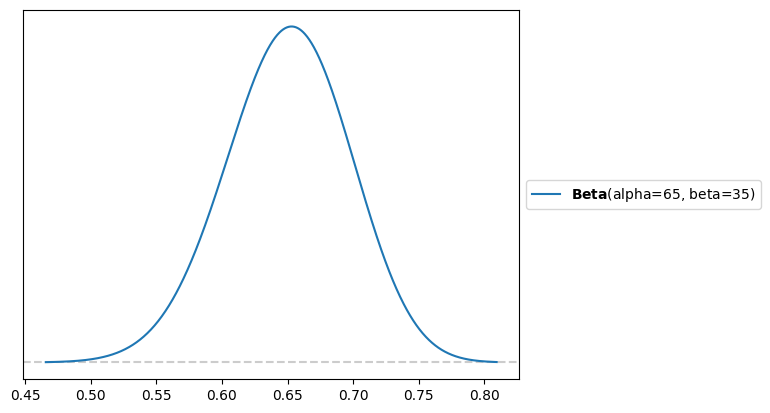

In [15]:
pz.Beta(alpha=65,beta=35).plot_pdf()

In [16]:
FS_prior = pz.Beta(alpha=65,beta=35)
FS_prior_mode = (FS_prior.alpha - 1)/(FS_prior.alpha + FS_prior.beta - 2)
FS_prior.mean(), FS_prior.median(), FS_prior_mode

(np.float64(0.65), 0.6510037446223805, np.float64(0.6530612244897959))

In [17]:
import pymc as pm


Now lets say that we only observed one match of the first tournament of the 2025 season; the Australian open. The match we observed was between Carlos Alcaraz and Nuno Borges. Alcaraz won the match 6-2 6-4 6-7(3) 6-2, and got his first serve in 68 times out of 109 service points during the game.

In [18]:
#Times Alcaraz MADE his first serve observed
FS_makes = np.repeat(1, 68)

#Times Alcaraz MADE his first serve observed
FS_misses = np.repeat(0, 41)


FS_data = np.concatenate( [FS_makes,FS_misses] )




In [ ]:



with pm.Model() as alc_FS:

  θ = pm.Beta('θ' , alpha = 65. , beta = 35.)
  y = pm.Bernoulli('y', p = θ, observed = FS_data)

  idata_FS = pm.sample()


In [45]:
import arviz as az

<Axes: title={'center': 'θ'}>

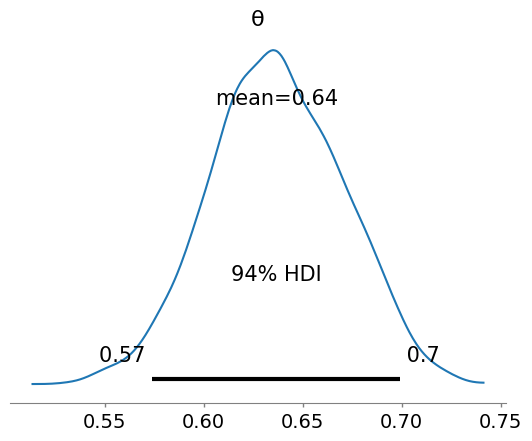

In [52]:
az.plot_posterior(idata_FS)

This data shows that is most likely for Alcaraz to hit his first serve in 62% of the time when considering his Australian open match, but that the mean is 64%, which tells us that his overall percentage for the 2025 season on 64%.

In the 2025 season, Alcaraz did actually hit his first serve in 64% of the time. While this predition was accurate, I think there are lots more factors for how well he will serve in a given match. Specifically, I noticed that Alcaraz serves less hard against worst players, as he can take less risks. Another factor is tennis is court material-clay, hard, or grass-which is usually more important in tennis stats but is roughly the same for first serve percentage.